In [73]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from matplotlib import animation
from IPython.display import HTML

import matplotlib
matplotlib.rcParams['animation.writer'] = 'avconv'
%matplotlib inline


from ipywidgets import interact
# workaround function for strange interact implementation
def showInInteract():
    import inspect
    for i in range(5):
        if 'interaction.py' in inspect.stack()[i][1]: plt.show()

# The complex Fourier Series and its relation to the Fourier Transform

In two recent articles we have talked about the [Fourier Series](http://dspillustrations.com/pages/posts/misc/fourier-series-and-harmonic-approximation.html) and an application in harmonic analysis of [instrument sounds](http://dspillustrations.com/pages/posts/misc/the-sound-of-harmonics-approximating-instrument-sounds-with-fourier-series.html) in terms of their Fourier coefficients. In this article, we will analyze the relation between the Fourier Series and the Fourier Transform. 

## The Fourier Series as sums of sines and cosines
To recap, the Fourier series of a signal $x(t)$ with period $P$ is given by

$$\begin{align}x(t)=\frac{a_0}{2}+\sum_{n=1}^\infty a_n\cos(2\pi nt/P)+b_n\sin(2\pi nt/P)\end{align}$$

where the coefficients are given by

$$\begin{align}a_n&=\frac{2}{P}\int_{-\frac{P}{2}}^\frac{P}{2}x(t)\cos(2\pi nt/P)dt\\b_n&=\frac{2}{P}\int_{-\frac{P}{2}}^\frac{P}{2}x(t)\sin(2\pi nt/P)dt\end{align}.$$

As we see, the Fourier series is a sum of sines and cosines with different amplitudes. Let us first look at the sum of a sine and cosine with different amplitudes:

### Sum of a sine and cosine with equal frequency

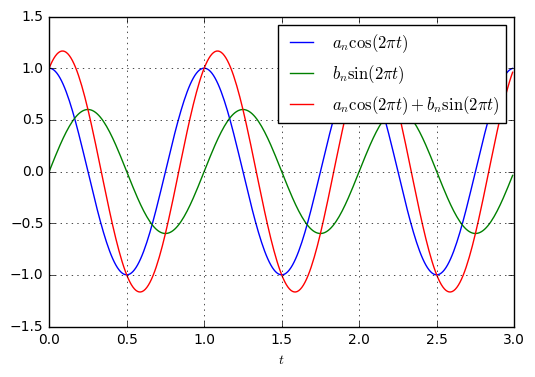

In [66]:
Fs = 100  # the sampling frequency for the discrete analysis
T = 3     # time duration to look at
P = 1     # signal period
t = np.arange(0, T, 1/Fs)

a_n = 1
b_n = 0.6

s = lambda t: a_n*np.cos(2*np.pi*t/P)
c = lambda t: b_n*np.sin(2*np.pi*t/P)

plt.plot(t, s(t), 'b', label='$a_n\cos(2\pi t)$')
plt.plot(t, c(t), 'g', label='$b_n\sin(2\pi t)$')
plt.plot(t, s(t)+c(t), 'r', label='$a_n\cos(2\pi t)+b_n\sin(2\pi t)$')
plt.legend(); plt.grid(); plt.xlabel('$t$');

As it appears, the sum of a sine and cosine of different amplitudes but same frequency equals another harmonic function with different amplitude and some phase shift. Hence, we can write
$$a_n\cos(2\pi nt/P)+b_n\sin(2\pi nt/P) = A_n\cos(2\pi nt/P+\phi_n)$$
where $A_n$ is the amplitude and $\phi_n$ is the phase of the resulting harmonic. In the following, we will calculate the values  of $A_n$ and $\phi_n$ from $a_n, b_n$. Let us start with the following identities:

$$\begin{align}\cos(x)&=\frac{1}{2}(\exp(jx)+\exp(-jx))\\ \sin(x)&=-\frac{j}{2}(\exp(jx)-\exp(-jx))\end{align}.$$

Then, we can write the sine and cosine and their sum as 

$$
\begin{align}
a_n\cos(2\pi nt/P)&=\frac{a_n}{2}(\exp(j2\pi nt/P)+\exp(-j2\pi nt/P))\\
b_n\sin(2\pi nt/P)&=-\frac{jb_n}{2}(\exp(j2\pi nt/P)-\exp(-j2\pi nt/P))\\
a_n\cos(2\pi nt/P)+b_n\sin(2\pi nt/P)&=(a_n-jb_b)\frac{1}{2}\exp(j2\pi nt/P)+(a_n+jb_n)\frac{1}{2}\exp(-j2\pi nt/P)
\end{align}
$$

We can now convert the cartesian expression for $a_n-jb_n$ into the polar form by
$$\begin{align}&&a_n-jb_n&=A_n\exp(j\phi_n)\\
\text{with }A_n&=\sqrt{a_n^2+b_n^2} &\text{and}&&\phi_n&=\tan^{-1}(-b_n/a_n)\end{align}$$

Accordingly, we can reformulate the sum of sine and cosine as
$$\begin{align}a_n\cos(2\pi nt/P)+b_n\sin(2\pi nt/P)&=A_n\frac{1}{2}(\exp(j2\pi nt/P+\phi_n)+\exp(-j(2\pi nt/P+\phi_n))\\
&=A_n\cos(2\pi nt/P+\phi_n).\end{align}$$

This statement eventually confirms that the sum of a sine and cosine of same frequency but different amplitude is indeed another harmonic function. Let us verify this numerically:

In [67]:
def sumSineCosine(an, bn):
    Fs = 100
    T = 3
    P = 1
    t = np.arange(0, T, 1/Fs)
    
    A = np.sqrt(an**2+bn**2)
    phi = np.arctan2(-bn, an)

    f1 = an*np.cos(2*np.pi*t/P)
    f2 = bn*np.sin(2*np.pi*t/P)
    
    overall = A*np.cos(2*np.pi*t/P + phi)

    plt.gcf().clear()
    plt.plot(t, f1, 'b', label='$x(t)=a_n\cos(2\pi nft)$')
    plt.plot(t, f2, 'g', label='$y(t)=b_n\sin(2\pi nft)$')
    plt.plot(t, f1+f2, 'r', label='$x(t)+y(t)$')
    plt.plot(t, overall, 'ro', lw=2, markevery=Fs//(10), label='$A_n\cos(2\pi nft+\phi)$')
    plt.grid(True)
    plt.xlabel('$t$');
    plt.ylabel(r'$a_n\cos(2\pi ft), b_n\sin(2\pi ft), A_n\sin(2\pi ft+\phi)$')
    plt.legend(fontsize=10)
    plt.ylim((-3,3))
    plt.text(0.5, 2, r"$a_n=%.1f, b_n=%.1f$" % (an, bn), bbox=dict(facecolor="white"))
    showInInteract()

In [68]:
interact(sumSineCosine, an=(-1, 2, 0.1), bn=(-1, 2, 0.1));

As we can see, the result perfectly holds. 

## The Fourier Series with amplitude and phase

Now, let us express the Fourier Series in terms of our new formulation
$$x(t)=\frac{a_0}{2}+\sum_{n=1}^\infty A_n\cos(2\pi nt/P+\phi_n)$$

Here we see, that $x(t)$ is consisting of different harmonics, with the $n$th one having the amplitude $A_n$.  Since a harmonic function wave with amplitude $A$ has power $A^2/2$, the $n$th harmonic of $x(t)$ has the power $A_n^2/2=\frac{1}{2}(a_n^2+b_n^2)$. 



## Fourier Series with complex exponential

Let us now write the Fourier Series even in a different form. By replacing the sum of sine and cosine with exponential terms, we get

$$\begin{align}x(t)&=\frac{a_0}{2}+\sum_{n=1}^\infty a_n\cos(2\pi nt/P)+b_n\sin(2\pi nt/P)\\
&=\frac{a_0}{2}+\sum_{n=1}^\infty \frac{a_n-jb_n}{2}\exp(j2\pi nt/P) + \frac{a_n+jb_n}{2}\exp(-j2\pi nt/P)\end{align}$$

Let us now set $$c_n=\begin{cases}\frac{a_n-jb_n}{2} & n > 0\\\frac{a_0}{2} & n=0 \\ \frac{a_n+jb_n}{2} & c < 0\end{cases},$$

such that we can alternatively write the Fourier series as

$$x(t)=\sum_{n=-\infty}^{\infty}c_n\exp(j2\pi nt/P).$$

Even, the calculation of the coefficients $c_n$ is very straight-forward, as we have

$$\begin{align}c_n = \frac{a_n-jb_n}{2}&=\frac{1}{2}\left[\frac{2}{P}\int_{-\frac{P}{2}}^{\frac{P}{2}}x(t)\cos(2\pi nt/P)dt-j\frac{2}{P}\int_{-\frac{P}{2}}^{\frac{P}{2}}x(t)\sin(2\pi nt/P)dt\right]\\&=\frac{1}{P}\int_{-\frac{P}{2}}^{\frac{P}{2}}x(t)[\cos(2\pi nt/P)-j\sin(2\pi nt/P)]dt\\&=\frac{1}{P}\int_{-\frac{P}{2}}^{\frac{P}{2}}x(t)\exp(-j2\pi nt/P)dt\end{align}$$

for $n>0$. We get exactly the same expression for $n\leq 0$.

So, to summarize, the formulation for the Fourier series is given by

$$\begin{align}x(t)&=\sum_{n=-\infty}^{\infty}c_n\exp(j2\pi nt/P)\\
\text{with }c_n&=\int_{-\frac{P}{2}}^{\frac{P}{2}}x(t)\exp(-j2\pi nt/P)dt.\end{align}$$

We can again verify this numerically. First, let us implement the two different possibilities to calculate the Fourier series coefficients $a_n,b_n$ or $c_n$:

In [69]:
def fourierSeries_anbn(period, N):
    """Calculate the Fourier series coefficients an, bn up to the Nth harmonic"""
    result = []
    T = len(period)
    t = np.arange(T)
    for n in range(N+1):
        an = 2/T*(period * np.cos(2*np.pi*n*t/T)).sum()
        bn = 2/T*(period * np.sin(2*np.pi*n*t/T)).sum()
        result.append((an, bn))
    return np.array(result)

def fourierSeries_cn(period, N):
    """Calculate the Fourier series coefficients an, bn up to the Nth harmonic"""
    result = []
    T = len(period)
    t = np.arange(T)
    for n in range(N+1):
        c_plusn = 1/T * (period * np.exp(-2j*np.pi*n*t/T)).sum()
        c_minusn = 1/T * (period * np.exp(2j*np.pi*n*t/T)).sum()
        result.append((c_plusn, c_minusn))
    return np.array(result)

Then, let's calculate the coefficients for some function $x(t)$ with both methods and compare them.

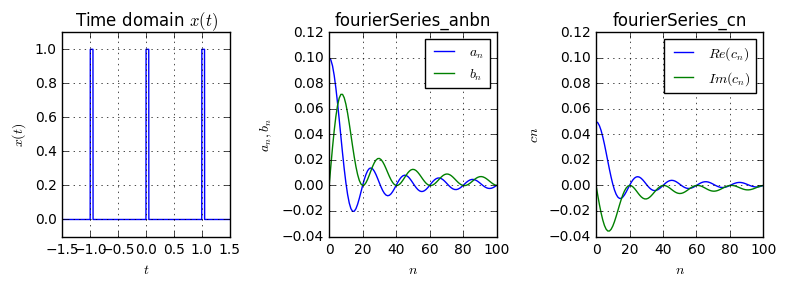

In [70]:
x = lambda t: (abs(t % 1)<0.05).astype(float)  # define a rectangular function

t = np.arange(-1.5, 1.5, 0.001)

plt.figure(figsize=(8,3))
plt.subplot(131) 
plt.plot(t, x(t))
plt.ylim((-0.1, 1.1)); plt.title('Time domain $x(t)$'); plt.xlabel('$t$'); plt.ylabel('$x(t)$'); plt.grid(True)


t_period = np.arange(0, 1, 0.001)
period = x(t_period)
anbn = fourierSeries_anbn(period, 100)
cn = fourierSeries_cn(period, 100)

plt.subplot(132)
plt.plot(anbn[:,0], label='$a_n$')
plt.plot(anbn[:,1], label='$b_n$')
plt.grid(True); plt.xlabel('$n$'); plt.ylabel('$a_n,b_n$'); plt.title('fourierSeries_anbn'); plt.legend(fontsize=10)
yl = plt.gca().get_ylim()

plt.subplot(133)
plt.plot(cn[:,0].real, label='$Re(c_n)$')
plt.plot(cn[:,0].imag, label='$Im(c_n)$')
plt.grid(True); plt.xlabel('$n$'); plt.ylabel('$cn$'); plt.title('fourierSeries_cn'); plt.legend(fontsize=10)
plt.ylim(yl)

plt.tight_layout()

As shown, the relation $c_n=\frac{a_n-jb_n}{2}, n>0$ exactly holds.

## The relation between the Fourier Series and Fourier Transform

Let us first repeat the Fourier series and Fourier transform pairs:

$$\begin{align}x(t)&=\sum_{n=-\infty}^{\infty}c_n\exp(j2\pi \frac{n}{P}t) &c_n&=\int_{-\frac{P}{2}}^{\frac{P}{2}}x(t)\exp(-j2\pi \frac{n}{P}t)dt&\text{Fourier Series}\\
x(t)&=\int_{-\infty}^{\infty}X(f)\exp(j2\pi ft)dt&X(f)&=\int_{-\infty}^{\infty}x(t)\exp(-j2\pi ft)dt&\text{Fourier Transform}\end{align}$$

We already see, that there is quite some similarity between the expressions for the series and transform. Let us investigate their relations:

We know that the Fourier transform can be applied for an aperiodic signal, whereas the Fourier series is used for a periodic signal with period $P$. Furthermore, we see that the Fourier transform allows the signal $x(t)$ to consist of arbitrary frequencies $f$, whereas the periodic signal $x(t)$ in the Fourier series is consisting only of harmonics of discrete frequency $f_n=\frac{n}{P}$. Let us reformulate the Fourier series with using the Dirac filter property

$$\int_{-\infty}^{\infty}x(t)\delta(t-\tau)dt=x(\tau)$$

to become 

$$x(t)=\int_{-\infty}^{\infty}X(f)\exp(j2\pi \frac{n}{P}t)df \text{ with }X(f)=\sum_{n=-\infty}^{\infty}c_n\delta(f-\frac{n}{P}).$$

The expression for $x(t)$ is now equal to the inverse Fourier transform, and we can already identify $X(f)$ as the spectrum of the periodic $x(t)$. We see that $X(f)$ of the periodic signal is discrete, i.e. it is nonzero at only the harmonic frequencies $\frac{n}{P}$. The difference between the discrete frequencies is $\frac{1}{P}$, i.e. it decreases with larger period lengths. If we now eventually assume $P\rightarrow\infty$, i.e. we let the period duration of the signal become infinite, we directly end up with the expression for the Fourier transform, because 

$$\lim_{P\rightarrow\infty}\sum_{n=-\infty}^{\infty}c_n\delta(f-\frac{n}{P})$$

becomes a continuous function of $f$, since the Diracs get closer and closer together, eventually merging to a smooth function (intuitively; mathematical rigorous treatment is omitted here). 

Let us eventually verify this relation numerically: We take a single rectangular pulse and increase its period's length, i.e. we keep the length of the rect pulse constant, but increase the distance between the pulses, eventually leading to a single, aperiodic pulse, when the period duration becomes infinite:

In [71]:
def compareSeriesAndTransform(P):
    Fs = 1000
    t = np.arange(0, 100, 1/Fs)
    t_period = np.arange(0, P, 1/Fs)
    x_p = lambda t: (abs((t % P)-0.5) <= 0.5).astype(float)
    x = lambda t: (abs(t-0.5) <= 0.5).astype(float)
    plt.gcf().clear()
    plt.subplot(121)
    plt.plot(t, x_p(t))
    plt.annotate(xy=(0, -0.02), xytext=(P, -0.02), s='', arrowprops=dict(arrowstyle='<->', shrinkA=0, shrinkB=0))
    plt.text(P/2, -0.02, '$P$', va='top', ha='center')
    plt.ylim((-0.1, 1.1)); plt.xlim((0, 15)); plt.ylabel('$x(t)$'); plt.xlabel('$t$')
    
    cn = fourierSeries_cn(x_p(t_period), 100)[:,0]
    f_discrete = np.arange(len(cn))/P
    
    f = np.linspace(0, Fs, len(t), endpoint=False)
    X = np.fft.fft(x(t))/Fs
    plt.subplot(122)
    plt.plot(f, abs(X), label='Fourier Tr. of rect')
    plt.stem(f_discrete, abs(cn*P), label='Fourier Series $c_n$')
    plt.xlim((0, 4))
    plt.xlabel('$f$'); plt.ylabel('$c_n, X(f)$'); plt.grid(True); plt.title('Frequency domain'); plt.legend(fontsize=10);
    
    plt.tight_layout(); showInInteract()

In [72]:
interact(compareSeriesAndTransform, P=(1, 10, 0.1));

As we have expected, the Fourier series provides a discrete spectrum of the periodic signal. The value of the discrete samples is equal to the value of the Fourier transform of the aperiodic signal.

## Summary
> - The Fourier Series can be formulated in 3 ways:

   $$\begin{align}1)\quad x(t)&=\frac{a_0}{2}+\sum_{n=1}^\infty a_n\cos(2\pi nt/P)+b_n\sin(2\pi nt/P)&a_n&=\frac{2}{P}\int_{-\frac{P}{2}}^\frac{P}{2}x(t)\cos(2\pi nt/P)dt&b_n&=\frac{2}{P}\int_{-\frac{P}{2}}^\frac{P}{2}x(t)\sin(2\pi nt/P)dt \\
  2)\quad x(t)&=\frac{a_0}{2}+\sum_{n=1}^\infty A_n\cos(2\pi nt/P+\phi_n)&A_n&=\sqrt{a_n^2+b_n^2}&\phi_n&=\tan^{-1}(-b_n/a_n)\\3)\quad x(t)&=\sum_{n=-\infty}^{\infty}c_n\exp(j2\pi nt/P)&c_n&=\int_{-\frac{P}{2}}^{\frac{P}{2}}x(t)\exp(-j2\pi nt/P)dt\end{align}$$
   
> - The Fourier Transform can be understood as the limiting case of the complex Fourier series, when the period grows to infinity. 